In [6]:
from libs.util import *
from libs.dynamic import *
from libs.factory import *
import numpy as np
import networkx as nx
import pysindy as ps
from scipy.optimize import curve_fit

[(0, 5), (1, 3), (2, 6), (3, 2), (4, 3), (5, 5), (6, 4), (7, 3), (8, 4), (9, 5)]


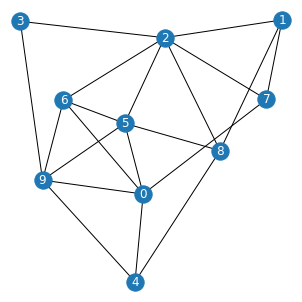

In [20]:
dynamic = 'bio'  # bio, population, epidemic
topology = 'small_world'  # erdos_renyi, small_world, barabashi, scale_free
func = get_dynamic_function(dynamic)

number_of_nodes = 10
alpha = -0.5
x0 = np.random.rand(number_of_nodes) * 10

graph = get_graph(number_of_nodes, topology)
print(graph.degree)
plt.rcParams["figure.figsize"] = (4,4)
nx.draw(graph, with_labels=True, font_color='white')
plt.show()

## Original Dynamic

In [21]:
train_steady_state = find_steady_state(func, x0)
print(train_steady_state)

dt = 1
train_perturbed_full = train_steady_state * alpha
g_matrix_train, x_train_flow = calculate_g_by_function(train_perturbed_full, train_steady_state, func, dt)
g_train_dist = find_matrix_dist(g_matrix_train)
f_train, logf_train = calculate_f(g_matrix_train, graph.degree)

[ 0.54293975  0.24387769 -3.62862878  0.15256719  0.47281282  0.17946344
  0.17146524  0.26029388  0.26791875 -1.92586038]


[2.305926302624457e-16, 3.093173174094289e-16, 7.044371335791009e-16, 8.17934605121271e-16, 8.287758990564677e-16, 9.790788456852605e-16, 1.2795802235360674e-15, 1.2949832230747909e-15, 1.4553889554571147e-15, 1.8209505656423766e-15, 0.0015075357313852698, 0.003271399989851568, 0.0034807435912156907, 0.003552667705296222, 0.0035917086175224905, 0.004300734476225379, 0.004352933413722237, 0.004730113885743187, 0.005453494115186047, 0.006059695099599052, 0.00853396938185276, 0.008613844702285302, 0.008638712427069928, 0.01272872467008786, 0.01815725744363528, 0.021469254579214656, 0.02319860712170163, 0.02495339618150822, 0.02732771646305633, 0.02777307555378847, 0.030670927924772596, 0.03470670175645589, 0.04896047527148479, 0.049872733855862585, 0.0537901033491407, 0.057338940535960774, 0.05754065963014147, 0.058955440539300595, 0.06026578467596321, 0.0604643532605632, 0.060944659629063425, 0.06175761185189575, 0.06243035606947891, 0.06271909951292147, 0.06368924031417993, 0.0637511741

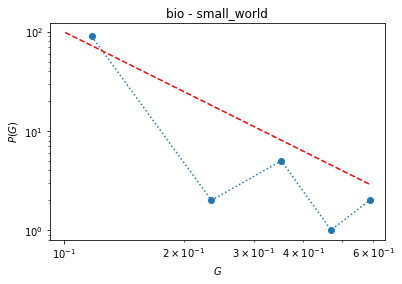

In [30]:
# plot_flow(x_train_flow)
x = np.linspace(min([x for x in g_train_dist if x>=0.1]),max(g_train_dist),100)
y = pow(x, -2)
plot_g(g_train_dist, title=f'{dynamic} - {topology}', f=(x,y))

## SINDy

In [32]:
dt = .01
x_train = create_dataset(graph, func, x0, dt)

custom_library = get_custom_library(dynamic)
model = ps.SINDy(feature_library=custom_library)
result = model.fit(x_train, t=dt)
model.print()

/home/ali/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


x0' = 0.000
x1' = 0.000
x2' = 0.005 x2 x5 + -0.001 x2 x6 + 0.005 x2 x8 + -0.002 x5 x6 + -0.011 x5 x8 + -0.001 x6 x8
x3' = 0.000
x4' = 0.000
x5' = 0.005 x2 x5 + -0.001 x2 x6 + 0.005 x2 x8 + -0.002 x5 x6 + -0.011 x5 x8 + -0.001 x6 x8
x6' = 0.001 x2 x5 + 0.001 x2 x8 + -0.002 x5 x8
x7' = 0.000
x8' = 0.004 x2 x5 + -0.001 x2 x6 + 0.004 x2 x8 + -0.001 x5 x6 + -0.009 x5 x8
x9' = 0.000


In [29]:
sindy_steady_state = find_steady_state(sindy, x_train[0])

print('train_steady_state:', train_steady_state)
print('sindy_steady_state:', sindy_steady_state)

train_steady_state: [-0.55757189 -1.87821046  0.5092933   1.98926512  0.63339787  2.10764952
  1.23803659  2.70337708 -2.5679957   0.43454877]
sindy_steady_state: [ 3.42163055 10.13616441  0.65838162 -0.40018694  6.11588124  1.9850474
  5.7695782  -0.10348533  6.72973541  1.65595574]


In [45]:
dt=.01
sindy_perturbed_full = sindy_steady_state * alpha
g_matrix_sindy, sindy_flow = calculate_g_by_model(sindy_perturbed_full, sindy_steady_state, model, dt)
g_sindy_dist = find_matrix_dist(g_matrix_sindy)
f_sindy, logf_sindy = calculate_f(g_matrix_sindy, graph.degree)
gamma_list_sindy = calculate_gamma(g_matrix_sindy, graph)

/home/ali/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


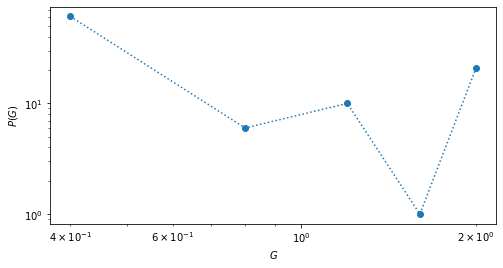

In [51]:
x = np.linspace(min([x for x in g_train_dist if x>=0.1]),max(g_train_dist),100)
y = pow(x, -2)
plot_g(g_sindy_dist, title=f'{dynamic} - {topology}', f=(x,y))

[4.81636255 0.77386598 0.806533   1.0651551  1.00408804 0.77203713
 0.86988651 2.85556822 1.72916543 1.37659726]
[1.68281868e+158 7.23014614e-002 7.10362740e-002 1.25390458e-003
 3.24625299e-002 1.48858582e+000 5.12458083e-001 8.20407754e-003
 2.02776554e-012 1.73364373e-001]
[203.33583895  -1.63219154  -1.47595962  -6.08175696  -2.47254038
   0.5739424   -0.48224705  -4.37199186 -19.42162315  -1.59506653]


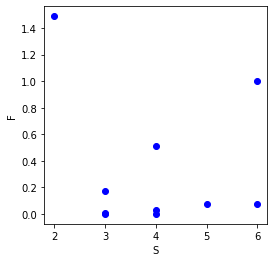

In [53]:
print(f_train)
print(f_sindy)
print(logf_sindy)

plt.figure(4)
plt.rcParams["figure.figsize"] = (4,4)
plt.title(f'{dynamic} - {topology}')
plt.xlabel('Degree (S)')
plt.ylabel('F')
for i in range(0,number_of_nodes):
    plt.plot(graph.degree[i], f_sindy[i] if f_sindy[i]<10 else 1 , 'bo')

[2.503055898882072e+158, 2.503055898882072e+158, 2.503055898882072e+158]


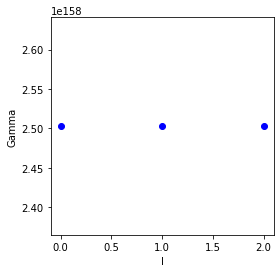

In [54]:
print(gamma_list_sindy)

plt.figure(5)
plt.rcParams["figure.figsize"] = (4,4)
plt.xlabel('Radius (l)')
plt.ylabel('Gamma')
for i, gamma in enumerate(gamma_list_sindy):
    plt.plot(i, gamma, 'bo')